In [22]:
library(tidyverse)
library(plyr)
library(magrittr)
library(dplyr)
library(tidyr)

In [23]:
sharks = as_tibble(read.csv("shark_data.csv"))
sharks

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/2006,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/2006,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
9/26/2006,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/2006,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
10/4/2006,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
10/9/2006,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
11/6/2006,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
11/7/2006,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
11/8/2006,Kaneohe,C. plumbeus,M,114.0,121,150,17,13.0
12/8/2006,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA


In [24]:
str(sharks)

Classes 'tbl_df', 'tbl' and 'data.frame':	807 obs. of  9 variables:
 $ Date    : Factor w/ 314 levels "1/1/2012","1/11/2013",..: 289 298 298 302 41 48 69 71 72 89 ...
 $ Location: Factor w/ 8 levels "Big Island","Ewa",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Species : Factor w/ 18 levels "A. narinari",..: 9 9 9 9 6 9 6 9 9 12 ...
 $ Sex     : Factor w/ 2 levels "F","M": 2 1 NA 1 2 1 2 1 2 1 ...
 $ PCL..cm.: num  NA 90 NA 103 140 134 89 136 114 110 ...
 $ FL      : Factor w/ 250 levels "100","101","102",..: NA 3 NA 14 50 42 250 51 22 21 ...
 $ TL      : num  NA 131 NA 144 190 183 116 188 150 170 ...
 $ Cin     : Factor w/ 58 levels "10","11","12",..: NA NA NA NA NA NA 16 NA 10 NA ...
 $ Cout    : num  NA NA NA NA NA NA 6.3 NA 13 NA ...


In [52]:
check_spelling = function(df, x){
    count(df, x)
}

check_spelling(sharks, "Species")

Species,freq
A. narinari,1
A. superciliosus,2
C. altimus,4
C. galapagensis,26
C. ignobilis,3
C. limbatis,35
C. melanopterus,3
C. oligoporus,1
C. plumbeus,367
D. lata,20


In [29]:
na.omit(sharks)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
11/6/2006,Kaneohe,C. limbatis,M,89,99,116,2.2,6.3
11/8/2006,Kaneohe,C. plumbeus,M,114,121,150,17,13.0
1/22/2007,Kaneohe,C. plumbeus,M,131,144,182,18,13.0
1/22/2007,Kaneohe,C. plumbeus,M,128,142,179,19,15.0
2/14/2007,Kaneohe,C. plumbeus,M,129,141,178,19.8,13.2
1/18/2008,Kaneohe,C. plumbeus,M,118,129,162,17,11.0
2/19/2008,Kaneohe,C. limbatis,M,85,97,127,7,3.6
2/28/2008,Kaneohe,C. limbatis,M,85,94,123,6.3,3.7
4/10/2008,Kaneohe,C. plumbeus,M,134,146,187,16,13.0
5/6/2008,Kaneohe,G. cuvier,M,137,155,199,11,6.0


In [55]:
remove_na = function(df, x){
    df %>%
    drop_na(x)
}
remove_na(sharks, "Species")

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/2006,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/2006,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
9/26/2006,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/2006,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
10/4/2006,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
10/9/2006,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
11/6/2006,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
11/7/2006,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
11/8/2006,Kaneohe,C. plumbeus,M,114.0,121,150,17,13.0
12/8/2006,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA


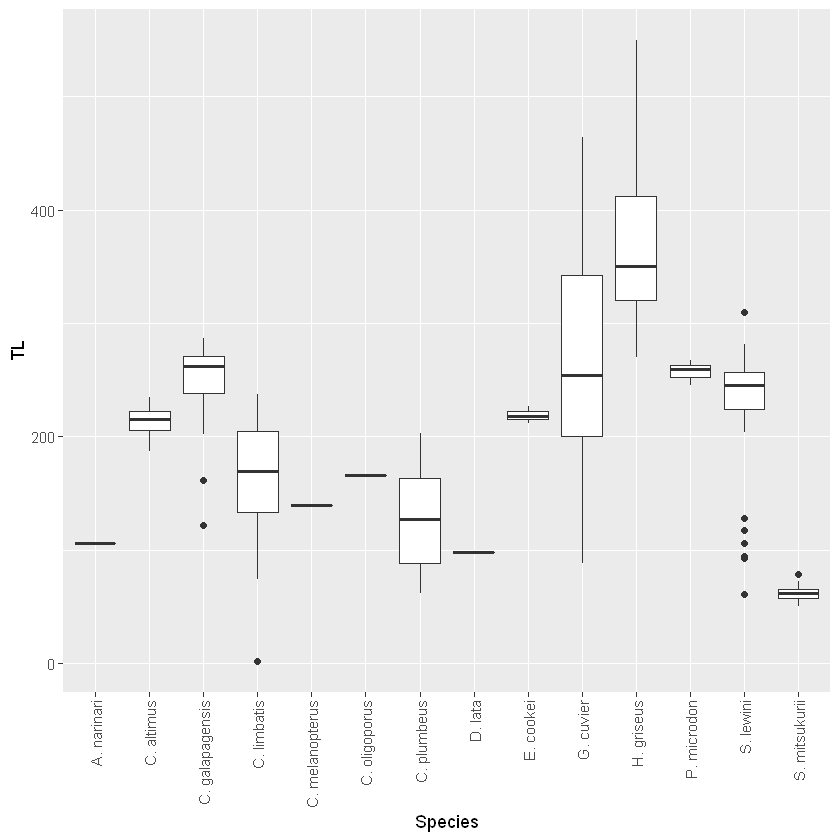

In [36]:
sharks %>% 
    drop_na(Species) %>% 
    drop_na(TL) %>%
    ggplot(aes(Species, TL)) + 
        geom_boxplot() +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

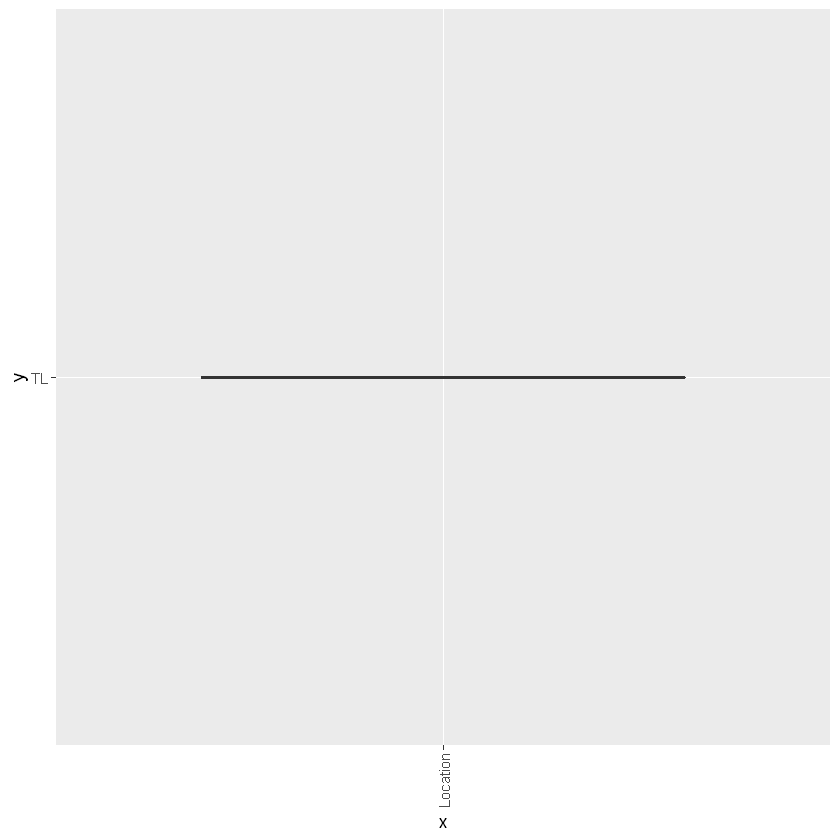

In [61]:
species_boxplot = function (df, x, y){
    df %>% 
    drop_na(x) %>% 
    drop_na(y) %>%
    ggplot(aes(x, y)) + 
        geom_boxplot() +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    }

species_boxplot(sharks, "Location", "TL")

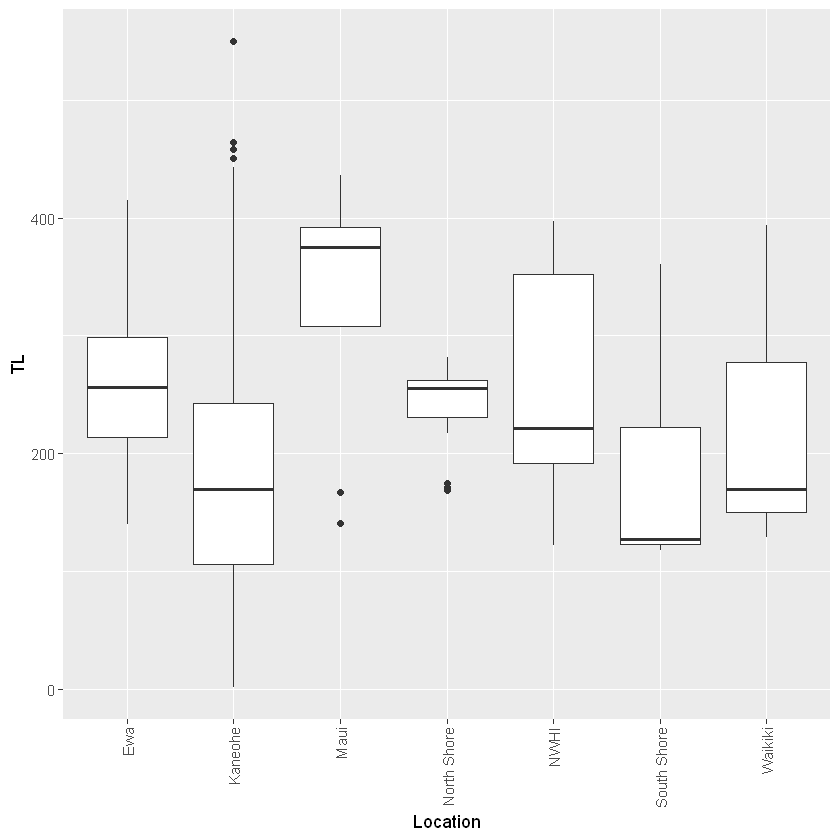

In [38]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Location) %>%
    ggplot(aes(Location, TL)) + 
        geom_boxplot() +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

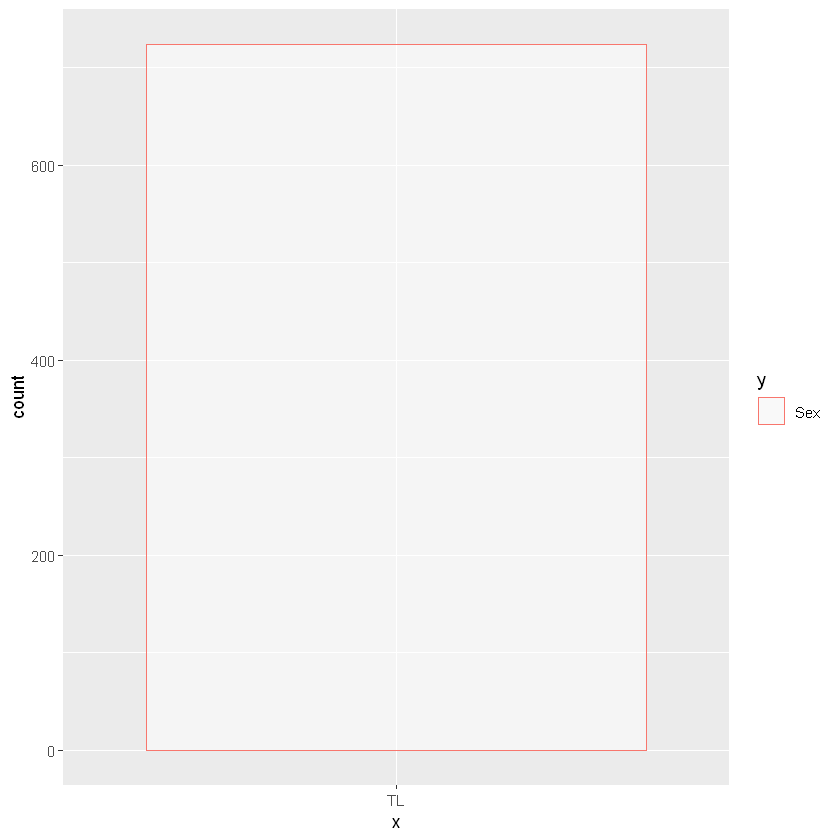

In [72]:
histogram = function(df, x, y){
    df %>%
    drop_na(x) %>% 
    drop_na(y) %>%
    ggplot(aes(x, color=y)) +
        geom_histogram(fill="white", alpha=0.5, position="identity", stat = "count")
}

histogram(sharks, "TL", "Sex")

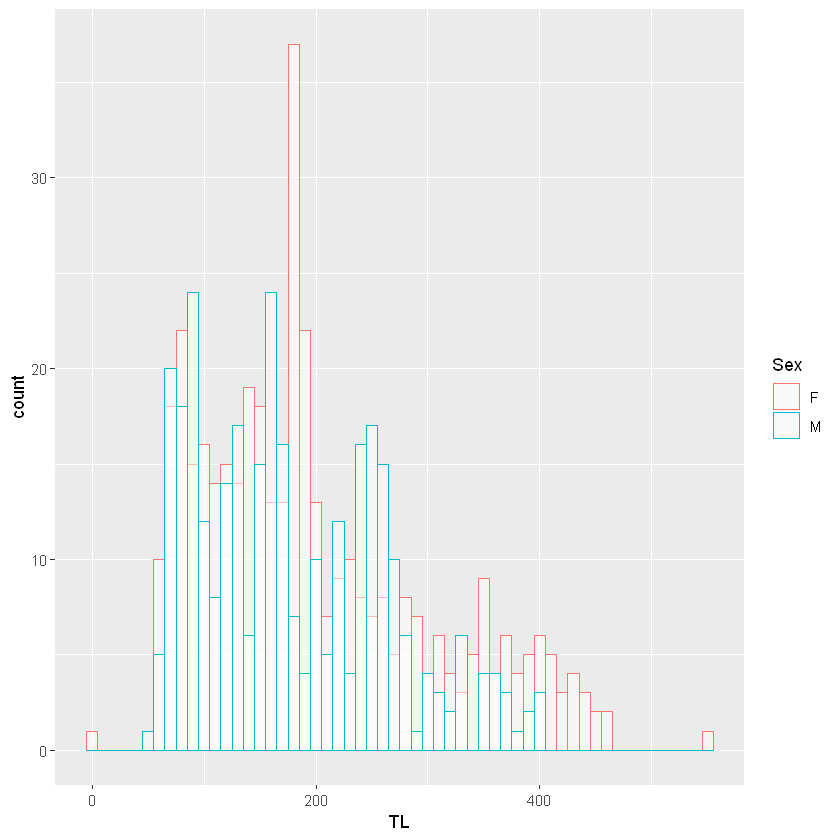

In [39]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Sex) %>%
    ggplot(aes(x=TL, color=Sex)) +
        geom_histogram(fill="white", alpha=0.5, position="identity", binwidth = 10, bins = 50)

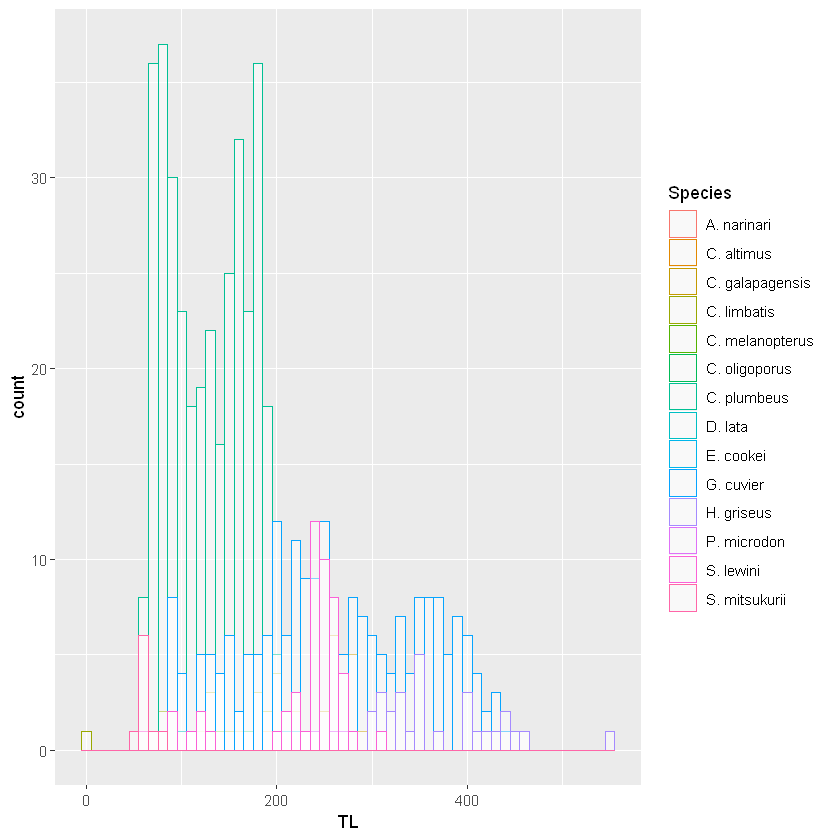

In [40]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Species) %>%
    ggplot(aes(x=TL, color=Species)) +
        geom_histogram(fill="white", alpha=0.5, position="identity", binwidth = 10, bins = 50)

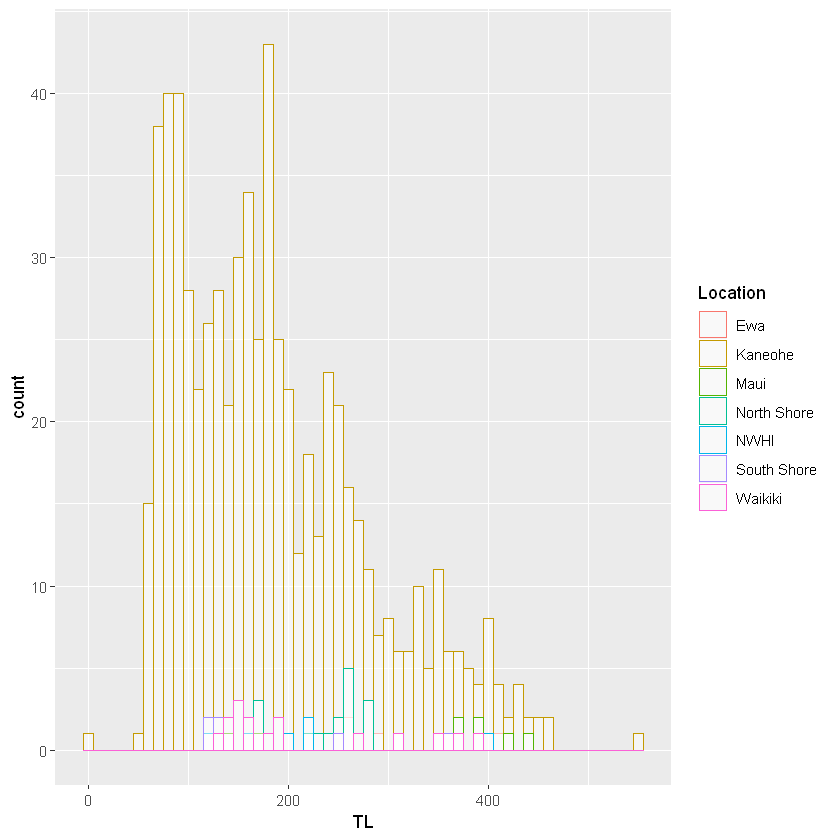

In [41]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Location) %>%
    ggplot(aes(x=TL, color=Location)) +
        geom_histogram(fill="white", alpha=0.5, position="identity", binwidth = 10, bins = 50)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

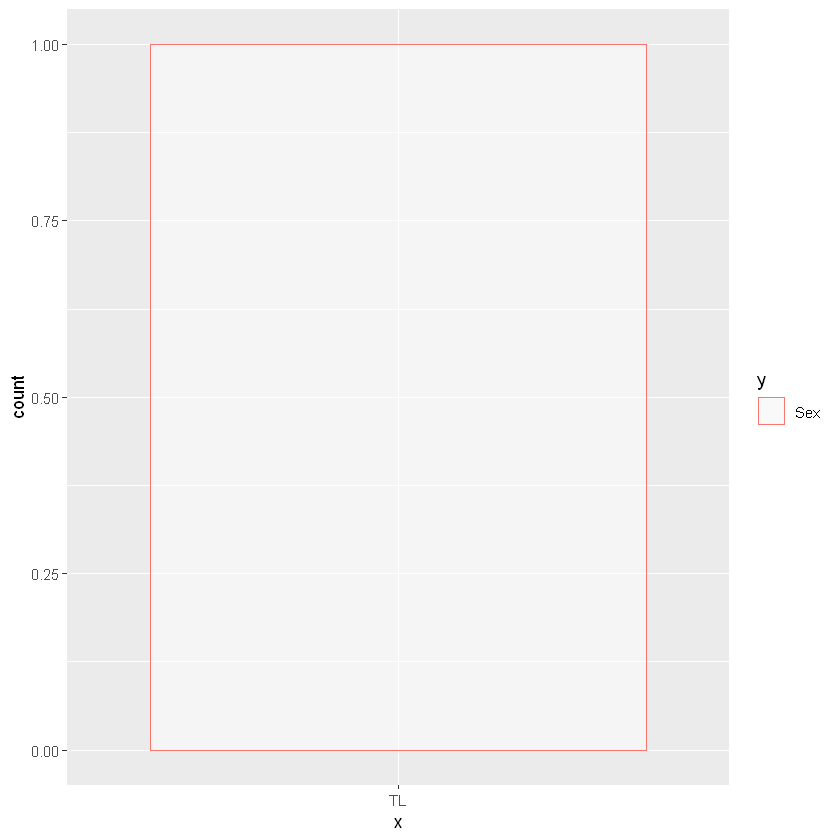

In [75]:
filtered_histogram = function(df, w, x, y, z){
    df %>% 
    drop_na(x) %>% 
    drop_na(w) %>%
    drop_na(y) %>%
    filter(w == z) %>%
    ggplot(aes(x, color = y)) +
        geom_histogram(alpha=0.5, position="identity", fill = "white", stat = "count")
}

filtered_histogram(sharks, "Species", "TL", "Sex", "C. plumbeus")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


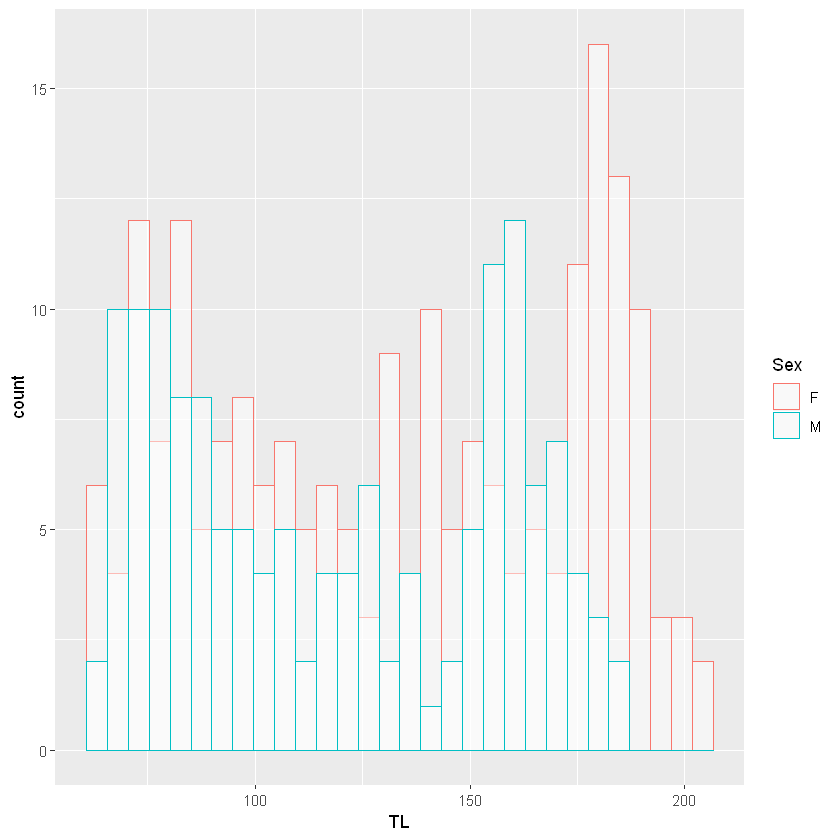

In [42]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Species) %>%
    drop_na(Sex) %>%
    filter(Species =="C. plumbeus") %>%
    ggplot(aes(x=TL, color = Sex)) +
        geom_histogram(alpha=0.5, position="identity", fill = "white")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


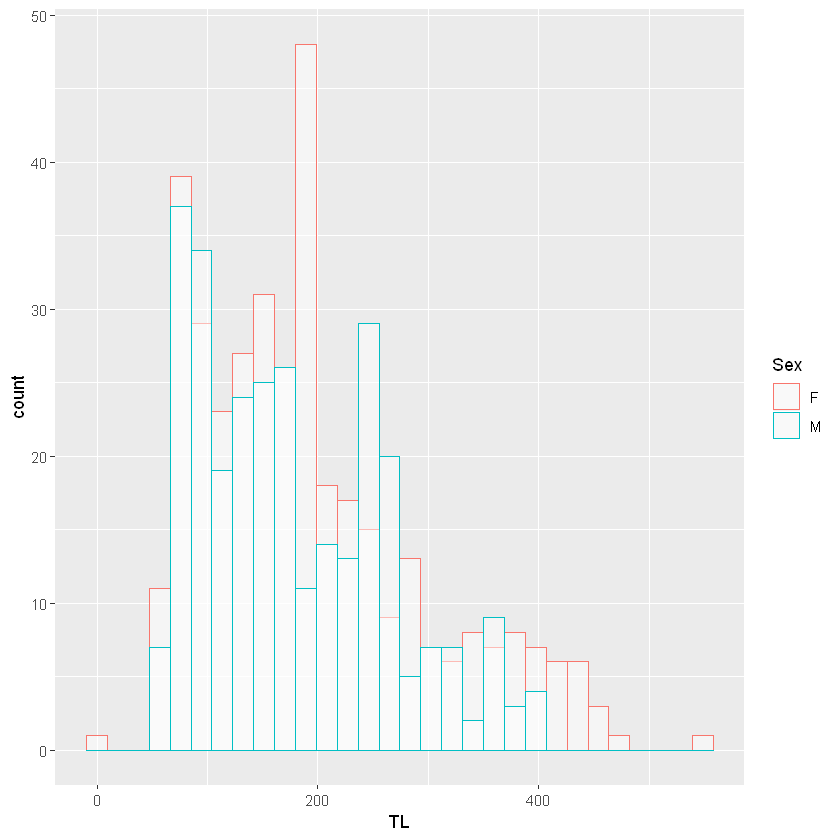

In [43]:
sharks %>% 
    drop_na(TL) %>% 
    drop_na(Species) %>%
    drop_na(Sex) %>%
    filter(Location =="Kaneohe") %>%
    ggplot(aes(x=TL, color = Sex)) +
        geom_histogram(alpha=0.5, position="identity", fill = "white")